### Project 2 - Thera Bank Personal Loan Campaign
#### By Obianuju Igbokwe

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Question 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy as sp
import statistics

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"


In [2]:
ploan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
# Check the first few rows of the import
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Check for the data type of each Series
ploan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# Statistical Summary of ploan
ploan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
# How is it possible that years of experience has -3 as a value?
emask = ploan.Experience== -3

print(ploan[emask])
print('')
print('-3 years experience seems to have been incorrectly imputed')

        ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
2618  2619   23          -3      55     92704       3    2.4          2   
3626  3627   24          -3      28     90089       4    1.0          3   
4285  4286   23          -3     149     93555       2    7.2          1   
4514  4515   24          -3      41     91768       4    1.0          3   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
2618       145              0                   0           0       1   
3626         0              0                   0           0       0   
4285         0              0                   0           0       1   
4514         0              0                   0           0       1   

      CreditCard  
2618           0  
3626           0  
4285           0  
4514           0  

-3 years experience seems to have been incorrectly imputed


In [7]:
#How skewed is the dataset?
ploan.drop(['ID','ZIP Code'], axis = 1).skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [8]:
# Dimension of ploan
ploan.shape

(5000, 14)

In [9]:
# How many null values are there, if any?
ploan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Question 2. EDA: Study the data distribution in each attribute and target variable, share your findings.

In [10]:
ploan.corr()
print('There is a moderate positive correlation of 0.5 between Income and Personal Loan.')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


There is a moderate positive correlation of 0.5 between Income and Personal Loan.



Age Series shows a multimodal distribution and skewness of -0.03


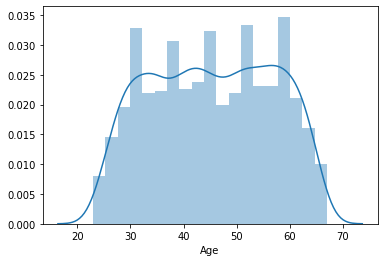

In [11]:
sns.distplot(ploan.Age)

print("")
print(f'Age Series shows a multimodal distribution and skewness of {sp.stats.skew(ploan.Age): .2f}')


There are 47 unique values of years of working experience among the customers
Experience shows a multimodal distribution and skewness of -0.03
There are 4 data points in Experience Series that are negative (-3 years). 
Since number of years of experience can only be positive, these data points are wrongly imputed.


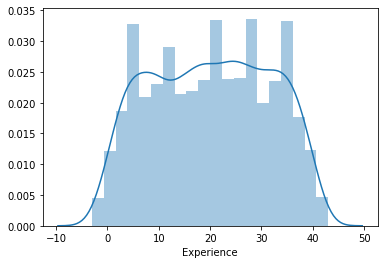

In [12]:
sns.distplot(ploan.Experience);
newline = '\n'
print(f'There are {ploan.Experience.nunique()} unique values of years of working experience among the customers')
print(f'Experience shows a multimodal distribution and skewness of {sp.stats.skew(ploan.Experience): .2f}')
print(f'There are {ploan.Experience[emask].shape[0]} data points in Experience Series that are negative (-3 years). \
{newline}Since number of years of experience can only be positive, these data points are wrongly imputed.')

The most income earned is 44 USD.
50% of the customers earn at least  64 USD.
The Income Series has a moderate positive skewness of  0.84
There are 162 unique salaries for customers in this distribution.


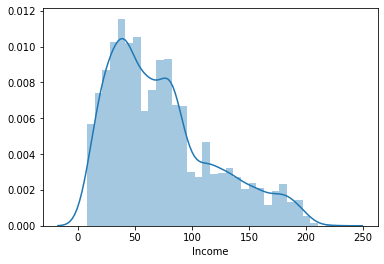

In [13]:
sns.distplot(ploan.Income)

print(f'The most income earned is {statistics.mode(ploan.Income)} USD.')
print(f'50% of the customers earn at least {ploan.Income.median(): .0f} USD.')
print(f'The Income Series has a moderate positive skewness of {sp.stats.skew(ploan.Income): .2f}')
print(f'There are {ploan.Income.nunique()} unique salaries for customers in this distribution.')

Most customers do not have children.
There are 4 categories of families among the customers.
There are 1472 customers with family size 1,      
1296 customers with family size 2,      
1010 customers with family size 3 and      
1222 customers with family size 4


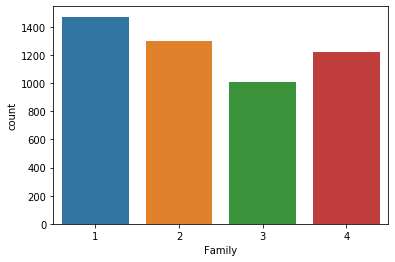

In [14]:
sns.countplot(ploan.Family)
newline = '\n'

print(f'Most customers do not have children.')
print(f'There are {ploan.Family.nunique()} categories of families among the customers.')
fam = [i for i in ploan.Family.value_counts()]
print(f'There are {fam[0]} customers with family size 1,\
      {newline}{fam[1]} customers with family size 2,\
      {newline}{fam[3]} customers with family size 3 and\
      {newline}{fam[2]} customers with family size 4')

In [15]:
# fam=[]
# for i in ploan.Family.value_counts():
#     fam.append(i)
# fam[0]

fam = [i for i in ploan.Family.value_counts()]

There are 108 unique credit card spendings monthly.
106 customers have zero credit card spending monthly.
Credit card spending distribution has a positive skew of  1.60.
50% of the customers spend  2 USD or below from their credit cards monthly.


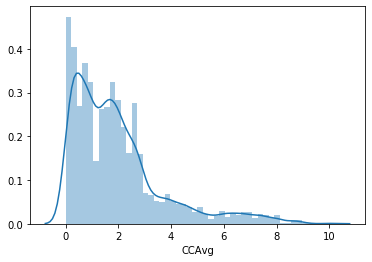

In [16]:
sns.distplot(ploan.CCAvg)
cmask = ploan.CCAvg== 0

print(f'There are {ploan.CCAvg.nunique()} unique credit card spendings monthly.')
print(f'{ploan.CCAvg[cmask].value_counts().sum()} customers have zero credit card spending monthly.')
print(f'Credit card spending distribution has a positive skew of {sp.stats.skew(ploan.CCAvg) : .2f}.')
print(f'50% of the customers spend {ploan.CCAvg.median(): .0f} USD or below from their credit cards monthly.')

Over 2000 customers are undergraduates.
There are 3 levels of education of customers in our dataset.
There are 2096 undergraduates,1403 graduates and      
1501 customers with advanced education or that are professionals.


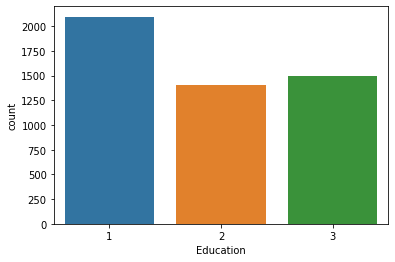

In [17]:
sns.countplot(ploan.Education)
newline = '\n'

print(f'Over 2000 customers are undergraduates.')
print(f'There are {ploan.Education.nunique()} levels of education of customers in our dataset.')
edu = [i for i in ploan.Education.value_counts()]
print(f'There are {edu[0]} undergraduates,{edu[2]} graduates and\
      {newline}{edu[1]} customers with advanced education or that are professionals.')


Undergraduates have more credit cards than graduates or professionals.


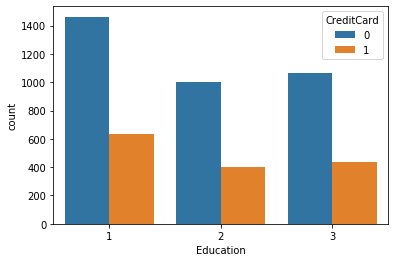

In [18]:
sns.countplot(ploan.Education,hue=ploan.CreditCard)

print('Undergraduates have more credit cards than graduates or professionals.')

Undergradrates spend more on credit cards than graduates or professionals.


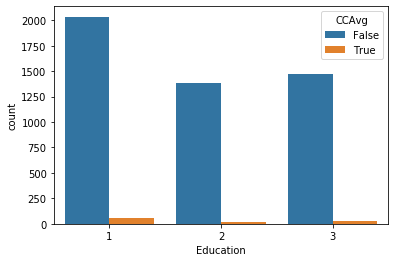

In [19]:
sns.countplot(ploan.Education,hue=cmask)
#cmask shows credit card spending of zero dollars
print('Undergradrates spend more on credit cards than graduates or professionals.')

There are 3462 people with zero mortgage.
Mortgage distribution has a high positive skew of  2.10.
There are 347 unique mortgage costs in the distribution.


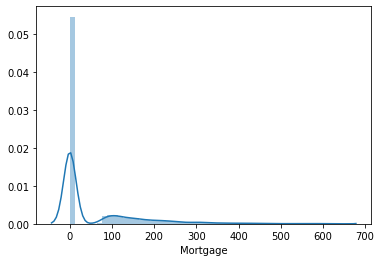

In [20]:
sns.distplot(ploan.Mortgage)

mmask = ploan.Mortgage == 0
print(f'There are {ploan.Mortgage[mmask].value_counts().sum()} people with zero mortgage.')
print(f'Mortgage distribution has a high positive skew of {sp.stats.skew(ploan.Mortgage): .2f}.')
print(f'There are {ploan.Mortgage.nunique()} unique mortgage costs in the distribution.')

There are 2 categories of Personal Loan variables. The customer either accepted or did not accept the loan.
480 people accepted the personal loan offered from the last campaign, while 4520 did not.


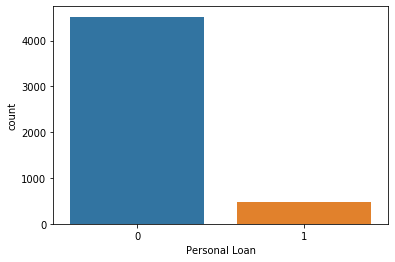

In [21]:
sns.countplot(ploan['Personal Loan'])
newline = '\n'
p_unique = ploan['Personal Loan'].nunique()
print(f'There are {p_unique} categories of Personal Loan variables. The customer either accepted or did not accept the loan.')
l = [i for i in ploan['Personal Loan'].value_counts()]
print(f'{l[1]} people accepted the personal loan offered from the last campaign, while {l[0]} did not.')

Professionals or customers with advanced education took more personal loans in the last campaign.


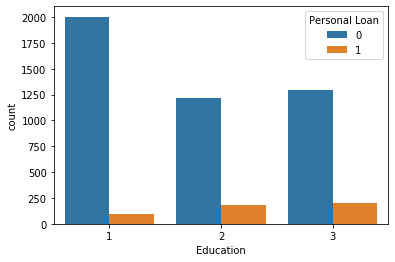

In [22]:
sns.countplot(ploan.Education,hue=ploan['Personal Loan'])
print('Professionals or customers with advanced education took more personal loans in the last campaign.')

Families of 3 and 4 took more personal loans in the last campaign.


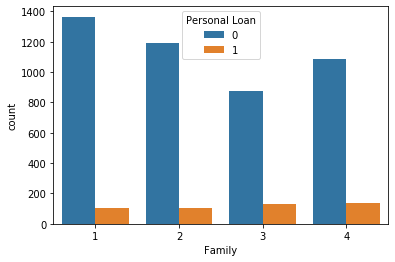

In [23]:
sns.countplot(ploan.Family,hue=ploan['Personal Loan'])
print('Families of 3 and 4 took more personal loans in the last campaign.')

Customers have 2 choices to make about having a securities accounts - yes or no.
4478 have no Securities Account, while 522 have a Securities Account


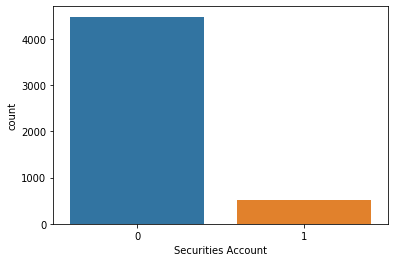

In [24]:
sns.countplot(ploan['Securities Account'])
newline = '\n'
sec_unique= ploan['Securities Account'].nunique()

print(f'Customers have {sec_unique} choices to make about having a securities accounts - yes or no.')
sec = [i for i in ploan['Securities Account'].value_counts()]
print(f'{sec[0]} have no Securities Account, while {sec[1]} have a Securities Account')

60 customers out of 522 customers with a Securities Account took a personal loan from the last campaign.
420 customers without a Securities Account took a personal loan from the last campaign.


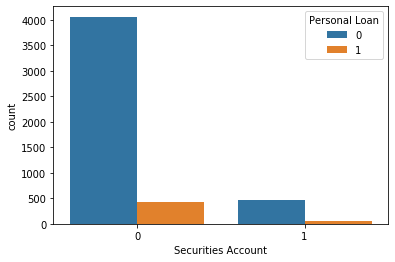

In [25]:
sns.countplot(ploan['Securities Account'], hue = ploan['Personal Loan'])
sAcc = ploan['Securities Account'][ploan['Securities Account']== 1].sum()
sLoan = ploan['Securities Account'][ploan['Personal Loan']==1].sum()
nsAcc = ploan['Personal Loan'][ploan['Securities Account']== 0].sum()

print(f'{sLoan} customers out of {sAcc} customers with a Securities Account took a personal loan from the last campaign.')
print(f'{nsAcc} customers without a Securities Account took a personal loan from the last campaign.')

302 customers have a certificate of deposit account, while 4698 do not.


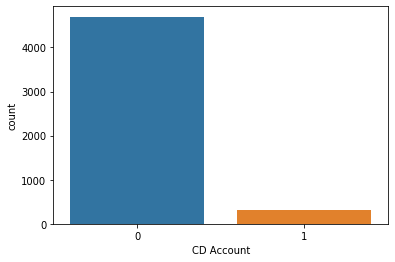

In [26]:
sns.countplot(ploan['CD Account'])
cda =[i for i in ploan['CD Account'].value_counts()]
print(f'{cda[1]} customers have a certificate of deposit account, while {cda[0]} do not.')

140 customers out of 302 customers with a CD Account took a personal loan from the last campaign.
340 customers without a CD Account took a personal loan from the last campaign.


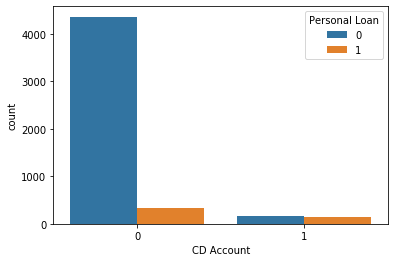

In [27]:
sns.countplot(ploan['CD Account'], hue=ploan['Personal Loan'])
cAcc = ploan['CD Account'][ploan['CD Account']== 1].sum()
cLoan = ploan['CD Account'][ploan['Personal Loan']==1].sum()
ncAcc = ploan['Personal Loan'][ploan['CD Account']== 0].sum()

print(f'{cLoan} customers out of {cAcc} customers with a CD Account took a personal loan from the last campaign.')
print(f'{ncAcc} customers without a CD Account took a personal loan from the last campaign.')

2984 customers have an online account, while 2016 do not.


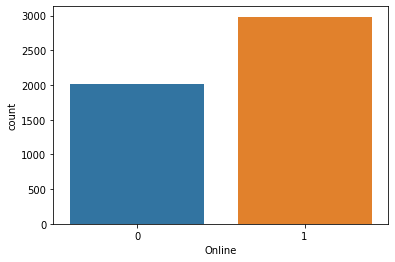

In [28]:
sns.countplot(ploan.Online)
onl = [i for i in ploan.Online.value_counts()]

print(f'{onl[0]} customers have an online account, while {onl[1]} do not.')

291 customers out of 2984 customers with an Online Account took a personal loan from the last campaign.
189 customers without an Online Account took a personal loan from the last campaign.


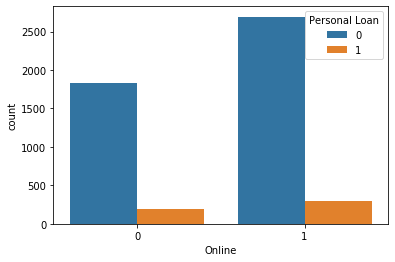

In [29]:
sns.countplot(ploan.Online, hue = ploan['Personal Loan'])

oAcc = ploan.Online[ploan.Online== 1].sum()
oLoan = ploan.Online[ploan['Personal Loan']==1].sum()
noAcc = ploan['Personal Loan'][ploan.Online== 0].sum()

print(f'{oLoan} customers out of {oAcc} customers with an Online Account took a personal loan from the last campaign.')
print(f'{noAcc} customers without an Online Account took a personal loan from the last campaign.')

1470 customers have credit cards, while 3530 do not.


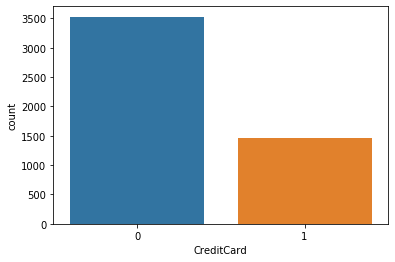

In [30]:
sns.countplot(ploan.CreditCard)
cr = [i for i in ploan.CreditCard.value_counts()]

print(f'{cr[1]} customers have credit cards, while {cr[0]} do not.')

143 customers out of 1470 customers with a Credit Card took a personal loan from the last campaign.
337 customers without a Credit Card took a personal loan from the last campaign.


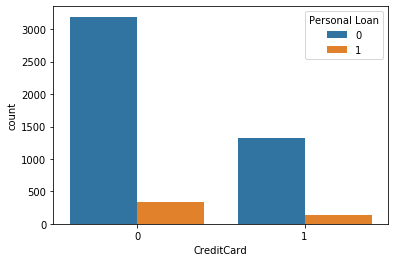

In [31]:
sns.countplot(ploan.CreditCard, hue = ploan['Personal Loan'])

crAcc = ploan.CreditCard[ploan.CreditCard== 1].sum()
crLoan = ploan.CreditCard[ploan['Personal Loan']==1].sum()
ncrAcc = ploan['Personal Loan'][ploan.CreditCard== 0].sum()

print(f'{crLoan} customers out of {crAcc} customers with a Credit Card took a personal loan from the last campaign.')
print(f'{ncrAcc} customers without a Credit Card took a personal loan from the last campaign.')

In [32]:
ploan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [33]:
#Get data model ready
ploan.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)

In [34]:
ploan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [35]:
# Incorrect imputation in Experience column
wr_impE3 = ploan.Experience== -3
wr_impE2 = ploan.Experience== -2
wr_impE1 = ploan.Experience== -1

#Replace the incorrect imputation with the median
ploan.Experience[wr_impE3] = ploan.Experience.median()
ploan.Experience[wr_impE2] = ploan.Experience.median()
ploan.Experience[wr_impE1] = ploan.Experience.median()

ploan.Experience.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [36]:
sp.stats.skew(ploan.Mortgage)

2.103371065804789

In [37]:
ploan.Mortgage.value_counts(normalize=True)

0      0.6924
98     0.0034
103    0.0032
119    0.0032
83     0.0032
        ...  
541    0.0002
509    0.0002
505    0.0002
485    0.0002
577    0.0002
Name: Mortgage, Length: 347, dtype: float64

In [38]:
print('We will drop the Mortgage column because it is highly skewed' )
ploan.drop('Mortgage', axis = 1, inplace = True)
ploan.head()

We will drop the Mortgage column because it is highly skewed


,Age,Experience,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [39]:
ploan.CCAvg.skew()

1.5984433366678663

In [40]:
ploan.CCAvg.value_counts(normalize=True)

0.30    0.0482
1.00    0.0462
0.20    0.0408
2.00    0.0376
0.80    0.0374
         ...  
2.75    0.0002
8.20    0.0002
9.30    0.0002
3.67    0.0002
5.33    0.0002
Name: CCAvg, Length: 108, dtype: float64

In [41]:
print('We will drop the CCAvg column since it is highly skewed.')
ploan.drop('CCAvg', axis = 1, inplace = True)
ploan.head()

We will drop the CCAvg column since it is highly skewed.


,Age,Experience,Income,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1,0,1,0,0,0
1,45,19,34,3,1,0,1,0,0,0
2,39,15,11,1,1,0,0,0,0,0
3,35,9,100,1,2,0,0,0,0,0
4,35,8,45,4,2,0,0,0,0,1


### Question 3. Split the data into training and test set in the ratio of 70:30 respectively.

In [42]:
X = ploan.drop('Personal Loan', axis = 1)
y = ploan[['Personal Loan']]

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

# y_train_r = y_train.values.ravel()

X_train.head()

,Age,Experience,Income,Family,Education,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1,0,0,1,0
4768,38,14,39,1,2,0,0,1,0
65,59,35,131,1,1,0,0,1,1
177,29,3,65,4,2,0,0,0,0
4489,39,13,21,3,2,0,0,1,0


### Question 4. Use Logistic Regression model to predict the likelihood of a customer buying personal loans. Print all the metrics related for evaluating the model performance.

In [44]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model
pl_model = LogisticRegression(solver='liblinear', random_state=42)
pl_model.fit(X_train, y_train)

#Predict on X_test
y_predict = pl_model.predict(X_test)

coef_pl = pd.DataFrame(pl_model.coef_)
coef_pl['intercept'] = pl_model.intercept_
print(coef_pl)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

          0         1         2         3         4         5        6  \
0 -0.093077  0.081033  0.046302  0.493988  1.241938 -0.903282  3.29601   

        7         8  intercept  
0 -0.6075 -1.056506  -7.858829  


In [45]:
# Function to get confusion matrix
def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted)
    akws = {'size':11, "ha": 'center',"va": 'top'}
    sns.heatmap(cm, cmap='Blues', annot=True,  annot_kws= akws, 
                fmt= 'd', xticklabels = [0,1] , yticklabels = [0,1])
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    sns.set(font_scale=1.4)
    plt.figure(figsize=(10, 7))
    plt.show()

Confusion Matrix


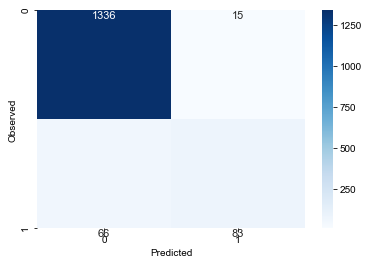

<Figure size 720x504 with 0 Axes>

None

True Positives (TP)- correct prediction that 85 customers will take the loan, 
True Negatives (TN)- correct prediction that 1336 customers will not take the loan, 
False Positives (FP)- incorrect prediction that 15 customers will take the loan (a "Type I error"), 
False Negatives (FN)- incorrect prediction that 66 customers will not take the loan (a "Type II error").

Training accuracy: 0.9482857142857143

Testing accuracy: 0.946

Recall: 0.5570469798657718

Precision: 0.8469387755102041

F1 Score: 0.6720647773279351

Roc Auc Score: 0.7729720465576083


In [46]:
newline = '\n'
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print(f'True Positives (TP)- correct prediction that 85 customers will take the loan, \
{newline}True Negatives (TN)- correct prediction that 1336 customers will not take the loan, \
{newline}False Positives (FP)- incorrect prediction that 15 customers will take the loan (a "Type I error"), \
{newline}False Negatives (FN)- incorrect prediction that 66 customers will not take the loan (a "Type II error").')

print()
print("Training accuracy:",pl_model.score(X_train,y_train))  
print()
print("Testing accuracy:",pl_model.score(X_test, y_test))
print()
print("Recall:", metrics.recall_score(y_test,y_predict))
print()
print("Precision:",metrics.precision_score(y_test,y_predict))
print()
print("F1 Score:",metrics.f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",metrics.roc_auc_score(y_test,y_predict))

### Question 5. Give your reasoning on how can the model perform better.

In [47]:
pl_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

We can improve the model by regularization to reduce generalised errors.

By specifying parameters such as setting solver to 'liblinear' instead of leaving it as the default 'None', we can get a better fitting s-curve and thus a better model. Without specifiying the solver as 'liblinear', the True Positive counts on the matrix is 78 as compared to 83 in this model and the True Negative is 1334, giving more False Positives (17) and False Negatives (71)

Tweaking other parameters such as penalty and weight give the following results:


In [48]:
#Tuning the 'penalty' parameter value
pl_model2 = LogisticRegression(solver='liblinear', 
                               penalty= 'l1',
                               random_state=42)

pl_model2.fit(X_train, y_train)
y2_predict = pl_model2.predict(X_test)

print()
print("Training accuracy:",pl_model2.score(X_train,y_train))  
print()
print("Testing accuracy:",pl_model2.score(X_test, y_test))
print()
print("Recall:", metrics.recall_score(y_test,y2_predict))
print()
print("Precision:",metrics.precision_score(y_test,y2_predict))
print()
print("F1 Score:",metrics.f1_score(y_test,y2_predict))
print()
print("Roc Auc Score:",metrics.roc_auc_score(y_test,y2_predict))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


Training accuracy: 0.9528571428571428

Testing accuracy: 0.9466666666666667

Recall: 0.5838926174496645

Precision: 0.8285714285714286

F1 Score: 0.6850393700787403

Roc Auc Score: 0.7852845766744991


In [49]:
#Tuning the 'class_weight' parameter
pl_model3 = LogisticRegression(solver='liblinear', 
                               penalty= 'l1',
                               random_state=42,
                               class_weight = 'balanced')

pl_model3.fit(X_train, y_train)
y3_predict = pl_model3.predict(X_test)

print()
print("Training accuracy:",pl_model3.score(X_train,y_train))  
print()
print("Testing accuracy:",pl_model3.score(X_test, y_test))
print()
print("Recall:", metrics.recall_score(y_test,y3_predict))
print()
print("Precision:",metrics.precision_score(y_test,y3_predict))
print()
print("F1 Score:",metrics.f1_score(y_test,y3_predict))
print()
print("Roc Auc Score:",metrics.roc_auc_score(y_test,y3_predict))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


Training accuracy: 0.8948571428571429

Testing accuracy: 0.8993333333333333

Recall: 0.8791946308724832

Precision: 0.4962121212121212

F1 Score: 0.6343825665859565

Roc Auc Score: 0.8903745175087804


### Question 6. Give Business understanding of your model.

I made an incorrect prediction that 13 will take the loan, but they did not take the loan. This means that the bank will target those 13 people in marketing without a return on investment.

I made an incorrect prediction that 66 people will not take the loan, but they took the loan and this brings more business to the bank. 

The bank would rather have people that they did not anticipate to take the personal loan, take the loan than have people that were predicted to take the loan do the opposite.

This means that precision should be reduced as much as possible so that there will be reduction in loss to the bank and more profit made from people taking personal loans.